In [1]:
from data_generator import ssp_data
import pickle
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('cmip6_yearly.csv')

In [8]:
df = df.drop(df.columns[[0, 1, 2, 3, 8]], axis=1)
df

,ACCESS-CM2,ACCESS-ESM1-5,AWI-CM-1-1-MR,BCC-CSM2-MR,CESM2,CESM2-WACCM,CIESM,CMCC-CM2-SR5,CNRM-CM6-1,CNRM-CM6-1-HR,...,MCM-UA-1-0,MIROC-ES2L,MIROC6,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,NorESM2-LM,NorESM2-MM,UKESM1-0-LL
0,-46.530746,-46.736160,-47.664900,-45.871475,-48.080520,-48.697372,-47.992570,-47.246490,-49.972214,-46.151886,...,-41.478546,-35.017350,-41.975998,-48.748642,-48.879730,-47.987274,-49.727860,-45.735016,-47.065660,-46.902298
1,-46.555344,-46.753998,-47.644333,-45.911850,-48.149567,-48.764435,-48.001570,-47.332504,-49.972214,-46.151886,...,-41.479218,-35.017610,-42.014923,-48.722015,-48.893480,-47.994644,-49.752700,-45.869400,-47.136444,-46.894882
2,-46.614790,-46.771760,-47.607346,-45.987230,-48.248550,-48.861115,-48.010468,-47.183180,-49.972214,-46.151886,...,-41.760040,-35.262497,-42.054245,-48.672410,-48.893510,-48.013260,-49.752716,-45.940582,-47.237167,-46.881516
3,-46.637253,-46.789536,-47.572480,-46.019073,-48.301620,-48.912277,-48.024216,-47.300156,-49.972214,-46.150467,...,-41.760710,-35.262787,-42.093796,-48.627914,-48.904922,-48.024690,-49.764970,-45.974350,-47.292100,-46.864853
4,-46.684800,-46.807480,-47.533800,-46.096664,-48.345230,-48.954742,-48.039337,-47.138474,-49.914810,-46.140410,...,-41.761383,-35.510727,-42.173294,-48.586290,-48.907974,-48.058334,-49.779190,-45.996506,-47.337875,-46.850082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6939643,-8.869141,-7.745544,-10.337036,-12.175598,-8.155914,-9.784058,-3.121704,3.764526,-12.134583,-11.514770,...,-10.051208,-7.184082,-8.469543,-9.867615,-10.098083,-10.355408,-9.925964,-11.634186,-14.485992,-0.723083
6939644,-8.856201,-7.733551,-10.335327,-12.072876,-8.151398,-9.779083,-3.116089,3.767273,-12.133728,-11.514770,...,-10.019287,-7.134735,-8.458710,-9.865112,-10.097717,-10.353271,-9.923767,-11.627136,-14.485352,-0.717224
6939645,-8.845123,-7.726227,-10.333984,-12.072357,-8.146423,-9.773499,-3.110626,3.768219,-12.132812,-11.472290,...,-10.019226,-7.087555,-8.447510,-9.859009,-10.096710,-10.352112,-9.921326,-11.617737,-14.483185,-0.712341
6939646,-8.838043,-7.719238,-10.329926,-12.071259,-8.140381,-9.766785,-3.105164,3.768616,-12.132751,-11.466217,...,-9.992249,-7.087494,-8.423950,-9.854919,-10.094666,-10.349731,-9.916016,-11.607086,-14.478149,-0.707458


In [19]:
import torch
import torch_geometric
import torch_geometric.transforms as T
from glob import glob
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cftime
import pickle

def get_device():
    if torch.cuda.is_available():
        device = torch.device('cuda:0')
    else:
        device = torch.device('cpu') # don't have GPU 
    return device

def create_tensors(df):
    device = get_device()
    return torch.from_numpy(df.values).t().float().to(device)

In [15]:
df

,ACCESS-ESM1-5,AWI-CM-1-1-MR,BCC-CSM2-MR,CESM2,CESM2-WACCM,CIESM,CMCC-CM2-SR5,CNRM-CM6-1,CNRM-CM6-1-HR,CNRM-ESM2-1,...,MCM-UA-1-0,MIROC-ES2L,MIROC6,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,NorESM2-LM,NorESM2-MM,UKESM1-0-LL
0,-46.736160,-47.664900,-45.871475,-48.080520,-48.697372,-47.992570,-47.246490,-49.972214,-46.151886,-48.586290,...,-41.478546,-35.017350,-41.975998,-48.748642,-48.879730,-47.987274,-49.727860,-45.735016,-47.065660,-46.902298
1,-46.753998,-47.644333,-45.911850,-48.149567,-48.764435,-48.001570,-47.332504,-49.972214,-46.151886,-48.586290,...,-41.479218,-35.017610,-42.014923,-48.722015,-48.893480,-47.994644,-49.752700,-45.869400,-47.136444,-46.894882
2,-46.771760,-47.607346,-45.987230,-48.248550,-48.861115,-48.010468,-47.183180,-49.972214,-46.151886,-48.586290,...,-41.760040,-35.262497,-42.054245,-48.672410,-48.893510,-48.013260,-49.752716,-45.940582,-47.237167,-46.881516
3,-46.789536,-47.572480,-46.019073,-48.301620,-48.912277,-48.024216,-47.300156,-49.972214,-46.150467,-48.586290,...,-41.760710,-35.262787,-42.093796,-48.627914,-48.904922,-48.024690,-49.764970,-45.974350,-47.292100,-46.864853
4,-46.807480,-47.533800,-46.096664,-48.345230,-48.954742,-48.039337,-47.138474,-49.914810,-46.140410,-48.553680,...,-41.761383,-35.510727,-42.173294,-48.586290,-48.907974,-48.058334,-49.779190,-45.996506,-47.337875,-46.850082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6939643,-7.745544,-10.337036,-12.175598,-8.155914,-9.784058,-3.121704,3.764526,-12.134583,-11.514770,-8.676117,...,-10.051208,-7.184082,-8.469543,-9.867615,-10.098083,-10.355408,-9.925964,-11.634186,-14.485992,-0.723083
6939644,-7.733551,-10.335327,-12.072876,-8.151398,-9.779083,-3.116089,3.767273,-12.133728,-11.514770,-8.679199,...,-10.019287,-7.134735,-8.458710,-9.865112,-10.097717,-10.353271,-9.923767,-11.627136,-14.485352,-0.717224
6939645,-7.726227,-10.333984,-12.072357,-8.146423,-9.773499,-3.110626,3.768219,-12.132812,-11.472290,-8.682251,...,-10.019226,-7.087555,-8.447510,-9.859009,-10.096710,-10.352112,-9.921326,-11.617737,-14.483185,-0.712341
6939646,-7.719238,-10.329926,-12.071259,-8.140381,-9.766785,-3.105164,3.768616,-12.132751,-11.466217,-8.682556,...,-9.992249,-7.087494,-8.423950,-9.854919,-10.094666,-10.349731,-9.916016,-11.607086,-14.478149,-0.707458


In [10]:
y

0         -46.530746
1         -46.555344
2         -46.614790
3         -46.637253
4         -46.684800
             ...    
6939643    -8.869141
6939644    -8.856201
6939645    -8.845123
6939646    -8.838043
6939647    -8.826416
Name: ACCESS-CM2, Length: 6939648, dtype: float64

In [20]:
def init_edge_list(n):
    edge_index = []
    for i in range(n):
        for j in range(n):
            if i != j:
                edge_index.append([i, j])
    edge_index = torch.tensor(edge_index, dtype=torch.long)
    return edge_index

edge_index = init_edge_list(34)

x_train = create_tensors(df)
y_train = create_tensors(y)
train_data = torch_geometric.data.Data(x=x_train, edge_index=edge_index.t().contiguous(), y=y_train)
train_data

Data(x=[34, 6939648], edge_index=[2, 1122], y=[6939648])

In [21]:
train_data.x

tensor([[-46.7362, -46.7540, -46.7718,  ...,  -7.7262,  -7.7192,  -7.7159],
        [-47.6649, -47.6443, -47.6073,  ..., -10.3340, -10.3299, -10.3244],
        [-45.8715, -45.9118, -45.9872,  ..., -12.0724, -12.0713, -12.0695],
        ...,
        [-45.7350, -45.8694, -45.9406,  ..., -11.6177, -11.6071, -11.5974],
        [-47.0657, -47.1364, -47.2372,  ..., -14.4832, -14.4781, -14.4742],
        [-46.9023, -46.8949, -46.8815,  ...,  -0.7123,  -0.7075,  -0.7020]])

In [24]:
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
import torch

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.edge_weight = torch.nn.Parameter(torch.ones(train_data.num_edges))
        self.conv1 = GCNConv(train_data.num_node_features, 16)
        self.conv2 = GCNConv(16, train_data.num_node_features)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index, torch.minimum(self.edge_weight.abs(),torch.ones(data.num_edges)))
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        # print(x, edge_index, torch.minimum(self.edge_weight.abs(),torch.ones(data.num_edges)))
        x = self.conv2(x, edge_index, torch.minimum(self.edge_weight.abs(),torch.ones(data.num_edges)))

        return x


In [25]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = GCN().to(device)
train_data = train_data.to(device)
# test_data = test_data.to(device)
train_loss_l = []
# test_loss_l = []
optimizer = torch.optim.Adam(model.parameters(), lr=0.05, weight_decay=5e-4)

model.train()
for epoch in range(1000):
    optimizer.zero_grad()
    out = model(train_data)
    train_loss = F.mse_loss(out, train_data.y)
    train_loss_l.append(train_loss.item())

    # test_out = model(test_data)
    # test_loss = F.mse_loss(test_out, test_data.y)
    # test_loss_l.append(test_loss.item())

    print(epoch, train_loss)
    train_loss.backward()
    optimizer.step()

C:\Users\jqcla\AppData\Local\Temp\ipykernel_29508\3368803185.py:13: UserWarning: Using a target size (torch.Size([6939648])) that is different to the input size (torch.Size([34, 6939648])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  train_loss = F.mse_loss(out, train_data.y)


0 tensor(432.7522, grad_fn=<MseLossBackward0>)


RuntimeError: [enforce fail at C:\b\abs_bao0hdcrdh\croot\pytorch_1675190257512\work\c10\core\impl\alloc_cpu.cpp:81] data. DefaultCPUAllocator: not enough memory: you tried to allocate 32088932352 bytes.

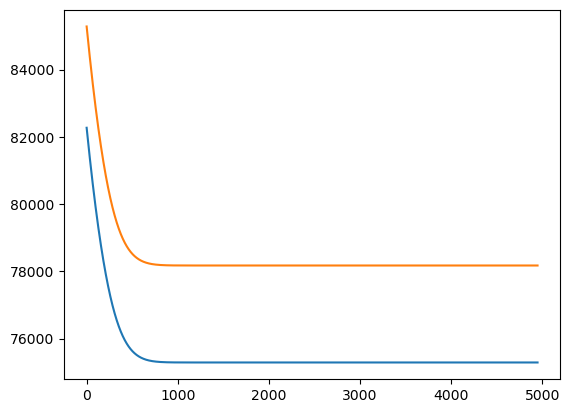

In [8]:
plt.plot(train_loss_l[50:], label='train')
plt.plot(test_loss_l[50:], label='test')

In [29]:
file = open('model', 'rb')
model = pickle.load(file)
file.close()

In [30]:
for i in model.edge_weight:
    print(i)
    

tensor(5.3375e-42, grad_fn=<UnbindBackward0>)
tensor(2.3570e-41, grad_fn=<UnbindBackward0>)
tensor(3.4538e-41, grad_fn=<UnbindBackward0>)
tensor(3.1756e-41, grad_fn=<UnbindBackward0>)
tensor(2.6329e-41, grad_fn=<UnbindBackward0>)
tensor(3.5124e-41, grad_fn=<UnbindBackward0>)
tensor(2.5223e-42, grad_fn=<UnbindBackward0>)
tensor(5.0503e-42, grad_fn=<UnbindBackward0>)
tensor(2.9003e-41, grad_fn=<UnbindBackward0>)
tensor(1.1210e-41, grad_fn=<UnbindBackward0>)
tensor(2.3121e-42, grad_fn=<UnbindBackward0>)
tensor(3.4989e-41, grad_fn=<UnbindBackward0>)
tensor(4.0468e-41, grad_fn=<UnbindBackward0>)
tensor(3.0114e-41, grad_fn=<UnbindBackward0>)
tensor(1.1691e-41, grad_fn=<UnbindBackward0>)
tensor(6.2526e-42, grad_fn=<UnbindBackward0>)
tensor(9.3733e-42, grad_fn=<UnbindBackward0>)
tensor(3.4958e-41, grad_fn=<UnbindBackward0>)
tensor(9.7909e-42, grad_fn=<UnbindBackward0>)
tensor(6.6183e-42, grad_fn=<UnbindBackward0>)
tensor(3.2838e-41, grad_fn=<UnbindBackward0>)
tensor(2.8232e-41, grad_fn=<Unbind

In [42]:
len(model.edge_weight)

1482

In [48]:
len(model.edge_weight)

1482

In [53]:
x = model.edge_weight
m = torch.zeros((39, 39))

tril_indices = torch.tril_indices(row=39, col=39, offset=-1)
triu_indices = torch.triu_indices(row=39, col=39, offset=1)
m[triu_indices[0], triu_indices[1]] = x[:741]
m[tril_indices[0], tril_indices[1]] = x[741:]

In [51]:
len(x[741:])

741

In [54]:
m

tensor([[ 0.0000e+00,  5.3375e-42,  2.3570e-41,  ...,  3.5115e-41,
          5.7748e-42,  5.7579e-42],
        [ 4.0733e-01,  0.0000e+00,  5.4392e-01,  ...,  5.4881e-01,
          5.4935e-01,  5.4838e-01],
        [ 3.9266e-01,  3.9411e-01,  0.0000e+00,  ..., -2.6734e-41,
         -3.5622e-41, -7.9215e-42],
        ...,
        [ 9.4199e-01,  9.3991e-01,  9.3873e-01,  ...,  0.0000e+00,
          4.1677e-01,  3.9065e-01],
        [ 1.0025e-01,  3.8167e-05,  2.1317e-08,  ...,  4.2419e-02,
          0.0000e+00,  4.1577e-01],
        [ 4.2765e-01,  4.4046e-01,  4.2617e-01,  ...,  4.4126e-01,
          4.3656e-01,  0.0000e+00]], grad_fn=<IndexPutBackward0>)

In [59]:
m1 = m.clone()
m1[m1.abs()<=1e-4] = 0
m1 

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.4073, 0.0000, 0.5439,  ..., 0.5488, 0.5494, 0.5484],
        [0.3927, 0.3941, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.9420, 0.9399, 0.9387,  ..., 0.0000, 0.4168, 0.3906],
        [0.1002, 0.0000, 0.0000,  ..., 0.0424, 0.0000, 0.4158],
        [0.4277, 0.4405, 0.4262,  ..., 0.4413, 0.4366, 0.0000]],
       grad_fn=<IndexPutBackward0>)

In [60]:
import pandas as pd

t_np = m1.detach().numpy() #convert to Numpy array
df = pd.DataFrame(t_np) #convert to a dataframe
df.to_csv("m1.csv",index=False) #save to file

In [26]:
file = open('model', 'wb')
pickle.dump(model, file)
file.close()